# MARATÓN BEHIND THE CODE 2020

## DESAFÍO 2: PARTE 1

### Introducción

En proyectos de ciencia de datos destinados a construir modelos de *aprendizaje automático*, o aprendizaje estadístico, es muy inusual que los datos iniciales ya estén en el formato ideal para la construcción de modelos. Se requieren varios pasos intermedios de preprocesamiento de datos, como la codificación de variables categóricas, normalización de variables numéricas, tratamiento de datos faltantes, etc. La biblioteca **scikit-learn**, una de las bibliotecas de código abierto más populares para *aprendizaje automático* en el mundo, ya tiene varias funciones integradas para realizar las transformaciones de datos más utilizadas. Sin embargo, en un flujo común de un modelo de aprendizaje automático, es necesario aplicar estas transformaciones al menos dos veces: la primera vez para "entrenar" el modelo, y luego nuevamente cuando se envían nuevos datos como entrada para ser clasificados por este modelo.

Para facilitar el trabajo con este tipo de flujos, scikit-learn también cuenta con una herramienta llamada **Pipeline**, que no es más que una lista ordenada de transformaciones que se deben aplicar a los datos. Para ayudar en el desarrollo y la gestión de todo el ciclo de vida de estas aplicaciones, además del uso de Pipelines, los equipos de científicos de datos pueden utilizar en conjunto **Watson Machine Learning**, que tiene docenas de herramientas para entrenar , gestionar, alojar y evaluar modelos basados ​​en el aprendizaje automático. Además, Watson Machine Learning es capaz de encapsular pipelines y modelos en una API lista para usar e integrarse con otras aplicaciones.

Durante el desafío 2, aprenderás como crear un **Pipeline** para un modelo de clasificación y alojarlo como una API con la ayuda de Watson Machine Learning. Una vez alojado, puedes integrar el modelo creado con otras aplicaciones, como asistentes virtuales y más. En este notebook, se presentará un ejemplo funcional de creación de un modelo y un pipeline en scikit-learn (¡que puedes usar como plantilla para tu solución!).

### Trabajando con Pipelines del scikit-learn

In [ ]:
# Primero, realizamos la instalación de scikit-learn versión 0.20.0 en el Kernel de este notebook:
!pip install scikit-learn==0.22.0 --upgrade

     |████████████████████████████████| 7.0MB 2.7MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
#JAIRO HERNANDEZ
!pip install -U scikit-learn

     |████████████████████████████████| 6.8MB 2.7MB/s 
  Found existing installation: scikit-learn 0.22
    Uninstalling scikit-learn-0.22:
      Successfully uninstalled scikit-learn-0.22


In [ ]:
# A continuación importaremos varias bibliotecas que se utilizarán:

# Biblioteca para trabajar con JSON
import json

# Biblioteca para realizar solicitudes HTTP
import requests

# Biblioteca para exploración y análisis de datos
import pandas as pd

# Biblioteca con métodos numéricos y representaciones matriciales
import numpy as np

# Biblioteca para construir un modelo basado en la técnica Gradient Boosting
import xgboost as xgb

# Paquetes scikit-learn para preprocesamiento de datos
# "SimpleImputer" es una transformación para completar los valores faltantes en conjuntos de datos
from sklearn.impute import SimpleImputer

# Paquetes de scikit-learn para entrenamiento de modelos y construcción de pipelines
# Método para separar el conjunto de datos en muestras de testes y entrenamiento
from sklearn.model_selection import train_test_split
# Método para crear modelos basados en árboles de decisión
from sklearn.tree import DecisionTreeClassifier
# Clase para crear una pipeline de machine-learning
from sklearn.pipeline import Pipeline

# Paquetes scikit-learn para evaluación de modelos
# Métodos para la validación cruzada del modelo creado
from sklearn.model_selection import KFold, cross_validate

### Importar  un .csv a tu proyecto en IBM Cloud Pak for Data al Kernel de este notebook

Primero, importaremos el conjunto de datos proporcionado para el desafío, que ya está incluido en este proyecto.

Puedes importar datos desde un archivo .csv directamente al Kernel del portátil como un Pandas DataFrame, que se usa ampliamente para manipular datos en Python.

Para realizar la importación, simplemente selecciona la siguiente celda y siga las instrucciones en la imagen a continuación:

![alt text](https://i.imgur.com/K1DwL9I.png "importing-csv-as-df")

Después de seleccionar la opción **"Insertar en el código"**, la celda de abajo se llenará con el código necesario para importar y leer los datos en el archivo .csv como un Pandas DataFrame.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df_data_1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset-tortuga-desafio-2.csv')
df_data_1.head()

,Unnamed: 0,NAME,USER_ID,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND,PROFILE
0,28,Stormy Muto,58283940,7.0,39.0,29.0,2.0,4.0,0.0,2.0,5.0,0.0,84.0,74.0,NaN,beginner_front_end
1,81,Carlos Ferro,1357218,32.0,0.0,44.0,2.0,0.0,0.0,0.0,5.0,0.0,67.0,45.0,NaN,beginner_front_end
2,89,Robby Constantini,63212105,45.0,0.0,59.0,0.0,5.0,4.0,0.0,4.0,1.0,NaN,54.0,47.0,advanced_front_end
3,138,Paul Mckenny,23239851,36.0,19.0,28.0,0.0,5.0,7.0,0.0,5.0,3.0,NaN,71.0,89.0,beginner_data_science
4,143,Jean Webb,72234478,61.0,78.0,38.0,6.0,11.0,0.0,4.0,3.0,0.0,66.0,85.0,NaN,advanced_front_end


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


Tenemos 16 columnas presentes en el set de datos proporcionado, 15 de las cuales son variables features (datos de entrada) y una de ellas es una variable target (que queremos que nuestro modelo va a predecir).

Las variables features son:

    Unnamed: 0                          - Esta columna no tiene nombre y debe ser eliminada del dataset
    NAME                                - Nombre del estudiante
    USER_ID                             - Número de identificación del estudiante
    HOURS_DATASCIENCE                   - Número de horas de estudio en Data Science
    HOURS_BACKEND                       - Número de horas de estudio en Web (Back-End)
    HOURS_FRONTEND                      - Número de horas de estudio en Web (Front-End)
    NUM_COURSES_BEGINNER_DATASCIENCE    - Número de cursos de nivel principiante en Data Science completados por el estudiante
    NUM_COURSES_BEGINNER_BACKEND        - Número de cursos de nivel principiante en Web (Back-End) completados por el estudiante
    NUM_COURSES_BEGINNER_FRONTEND       - Número de cursos de nivel principiante en Web (Front-End) completados por el estudiante
    NUM_COURSES_ADVANCED_DATASCIENCE    - Número de cursos de nivel avanzado en Data Science completados por el estudiante
    NUM_COURSES_ADVANCED_BACKEND        - Número de cursos de nivel avanzado en Web (Back-End) completados por el estudiante
    NUM_COURSES_ADVANCED_FRONTEND       - Número de cursos de nivel avanzado en Web (Front-End) completados por el estudiante
    AVG_SCORE_DATASCIENCE               - Promedio acumulado en cursos de Data Science completados por el estudiante
    AVG_SCORE_BACKEND                   - Promedio acumulado en cursos de Web (Back-End) completados por el estudiante
    AVG_SCORE_FRONTEND                  - Promedio acumulado en cursos de Web (Front-End) completados por el estudiante
    
La variable target es:

    PROFILE                             - Perfil de carrera del estudiante (puede ser uno de 6)
    
        - beginner_front_end
        - advanced_front_end
        - beginner_back_end
        - advanced_back_end
        - beginner_data_science
        - advanced_data_science
        
Con un modelo capaz de clasificar a un alumno en una de estas categorías, podemos recomendar contenidos a los alumnos de forma personalizada según las necesidades de cada alumno.

### Explorando los datos proporcionados

Podemos continuar la exploración de los datos proporcionados con la función ``info()``:

In [ ]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        20000 non-null  int64  
 1   NAME                              20000 non-null  object 
 2   USER_ID                           20000 non-null  int64  
 3   HOURS_DATASCIENCE                 19986 non-null  float64
 4   HOURS_BACKEND                     19947 non-null  float64
 5   HOURS_FRONTEND                    19984 non-null  float64
 6   NUM_COURSES_BEGINNER_DATASCIENCE  19974 non-null  float64
 7   NUM_COURSES_BEGINNER_BACKEND      19982 non-null  float64
 8   NUM_COURSES_BEGINNER_FRONTEND     19961 non-null  float64
 9   NUM_COURSES_ADVANCED_DATASCIENCE  19998 non-null  float64
 10  NUM_COURSES_ADVANCED_BACKEND      19992 non-null  float64
 11  NUM_COURSES_ADVANCED_FRONTEND     19963 non-null  float64
 12  AVG_

### Visualización (visualizations)

Para ver el conjunto de datos suministrado, podemos usar las bibliotecas ``matplotlib`` y ``seaborn``:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


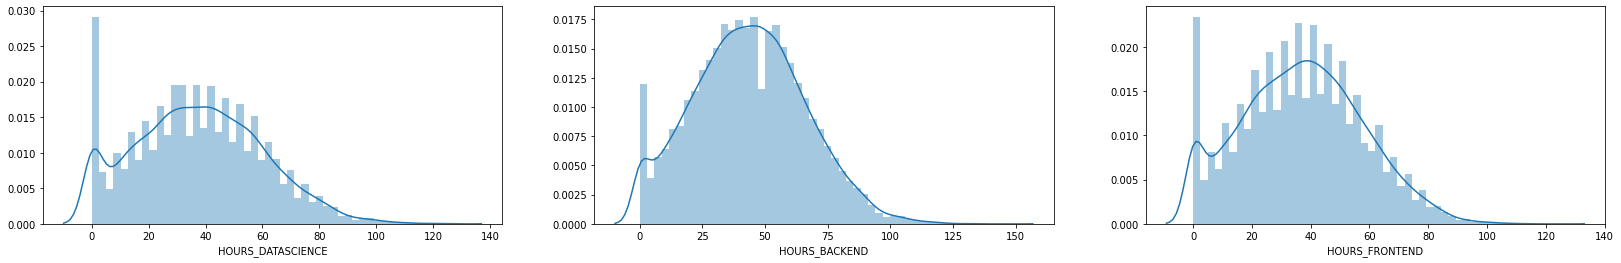

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28, 4))

sns.distplot(df_data_1['HOURS_DATASCIENCE'].dropna(), ax=axes[0])
sns.distplot(df_data_1['HOURS_BACKEND'].dropna(), ax=axes[1])
sns.distplot(df_data_1['HOURS_FRONTEND'].dropna(), ax=axes[2])

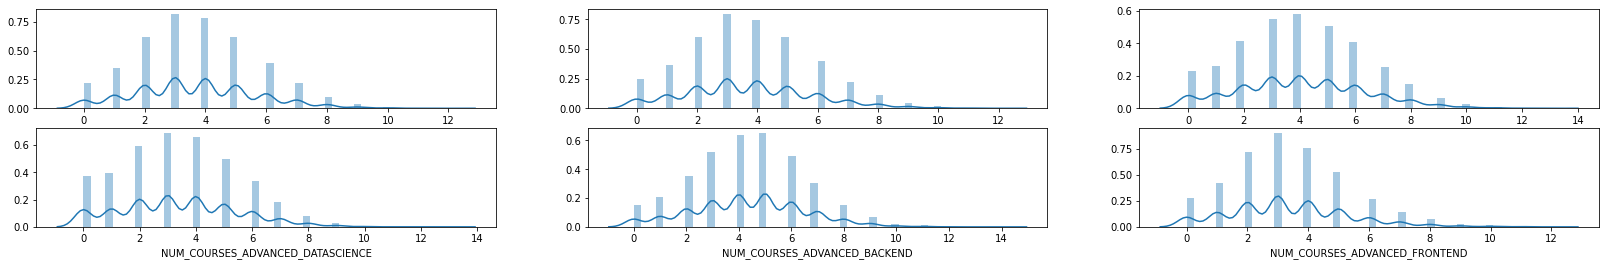

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(28, 4))

sns.distplot(df_data_1['NUM_COURSES_BEGINNER_DATASCIENCE'].dropna(), ax=axes[0][0])
sns.distplot(df_data_1['NUM_COURSES_BEGINNER_BACKEND'].dropna(), ax=axes[0][1])
sns.distplot(df_data_1['NUM_COURSES_BEGINNER_FRONTEND'].dropna(), ax=axes[0][2])
sns.distplot(df_data_1['NUM_COURSES_ADVANCED_DATASCIENCE'].dropna(), ax=axes[1][0])
sns.distplot(df_data_1['NUM_COURSES_ADVANCED_BACKEND'].dropna(), ax=axes[1][1])
sns.distplot(df_data_1['NUM_COURSES_ADVANCED_FRONTEND'].dropna(), ax=axes[1][2])

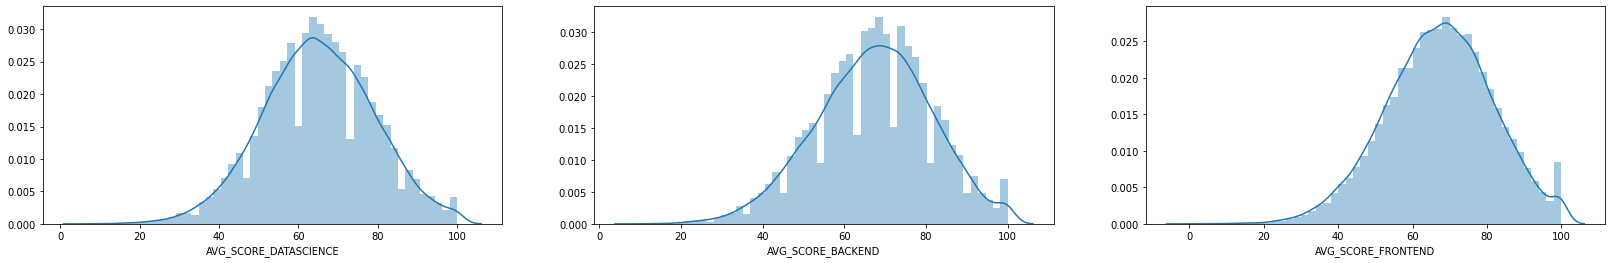

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28, 4))

sns.distplot(df_data_1['AVG_SCORE_DATASCIENCE'].dropna(), ax=axes[0])
sns.distplot(df_data_1['AVG_SCORE_BACKEND'].dropna(), ax=axes[1])
sns.distplot(df_data_1['AVG_SCORE_FRONTEND'].dropna(), ax=axes[2])

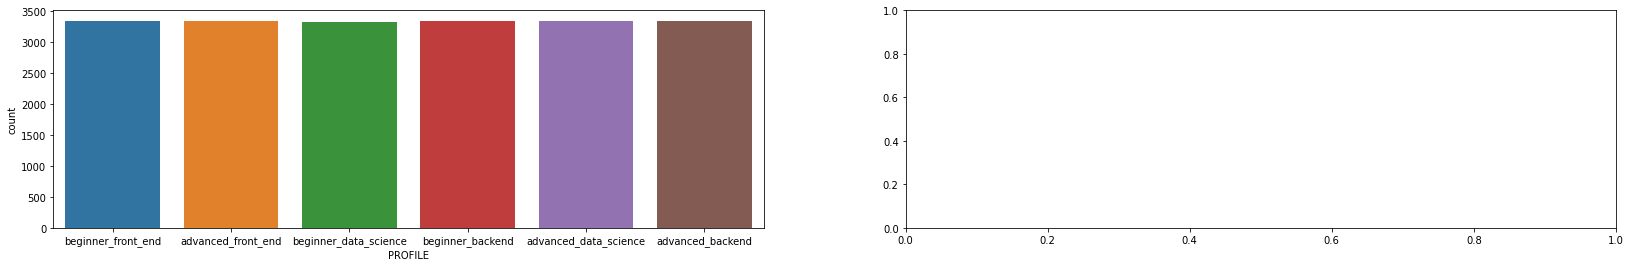

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(28, 4))

sns.countplot(ax=axes[0], x='PROFILE', data=df_data_1)

### Preprocesamiento de datos

Para el preprocesamiento de los datos, se presentarán en este notebook dos transformaciones básicas, demostrando la construcción de un Pipeline con un modelo funcional. Este Pipeline funcional provisto debe ser mejorado por el participante para que el modelo final alcance la mayor precisión posible, garantizando una mayor puntuación en el desafío. Esta mejora solo se puede realizar en el preprocesamiento de los datos, en la elección de un algoritmo para el entrenamiento de diferentes modelos, o incluso en la alteración del **framework** utilizado (sin embargo, solo se entregará un ejemplo de integración de Watson Machine Learning con *scikit-learn*).

La primera transformación (paso en nuestro Pipeline) será la exclusión de la columna "NOMBRE" de nuestro conjunto de datos, que además de no ser una variable numérica, tampoco es una variable relacionada con el desempeño de los estudiantes en las disciplinas. Hay funciones listas para usar en *scikit-learn* para realizar esta transformación, sin embargo, nuestro ejemplo demostrará cómo crear una transformación personalizada desde cero en scikit-learn. Si lo desea, el participante puede usar este ejemplo para crear otras transformaciones y agregarlas al Pipeline final :)

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn import preprocessing

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin


# All sklearn Transforms must have the `transform` and `fit` methods
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Primero copiamos el dataframe de datos de entrada 'X'
        data = X.copy()
        # Devolvemos un nuevo dataframe de datos sin las columnas no deseadas
        return data.drop(labels=self.columns, axis='columns')

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


# All sklearn Transforms must have the `transform` and `fit` methods
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y):
        return self
    
    def transform(self, X, y):
        #imputer
        imputer = KNNImputer()
        #scaler
        scaler = StandardScaler()
        #label encoder
        le = preprocessing.LabelEncoder()
        # Primero copiamos el dataframe de datos de entrada 'X'
        data = X.copy()
        labels =y.copy()
        # Devolvemos un nuevo dataframe de datos sin las columnas no deseadas
        data = data.drop(labels=self.columns, axis='columns')

        imp = data.copy()

        imp = imputer.fit_transform(imp.iloc[:, 0:-1])

        X = scaler.fit_transform(imp)

        y = np.array(labels).reshape(int(len(labels)),)

        le.fit(y)

        y = le.transform(y)

        y = np_utils.to_categorical(y)

        #return pd.concat([dataframe, pd.DataFrame(dummy_y)], axis=1, join='inner')
        return X, y

In [ ]:
'''

# Creación de instancias de una transformación DropColumns
rm_columns = DropColumns(
    columns=["USER_ID","NAME", "Unnamed: 0"]  # Esta transformación toma como parámetro una lista con los nombres de las columnas no deseadas
)

# Aplicar la transformación ``DropColumns`` al conjunto de datos base
rm_columns.fit(X=df_data_1)



X, y=rm_columns.transform(X=df_data_1)
'''



In [ ]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(128, input_dim=13, activation='relu'))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(15, activation = 'linear'))
    model.add(Dense(6, activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
rm_columns = DropColumns(columns=["NAME", "Unnamed: 0"])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

pipeline = Pipeline(
    steps=[
        ('remove_cols', rm_columns),
        ('imputer', KNNImputer()),
        ('scaler', StandardScaler()),
        ('model', SVC(kernel='rbf', tol= 0.001))
]
)

In [ ]:
pipeline.fit(X=X_train, y=y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('remove_cols', DropColumns(columns=['NAME', 'Unnamed: 0'])),
                ('imputer',
                 KNNImputer(add_indicator=False, copy=True,
                            metric='nan_euclidean', missing_values=nan,
                            n_neighbors=5, weights='uniform')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
pipeline.score(X_test, y_test)

0.9451666666666667

#### Transformación 1: excluir columnas del conjunto de datos

Para la creación de una transformación de datos personalizada en scikit-learn, es necesario crear una clase con los métodos ``transform`` y ``fit``. En el método de 'transform', se ejecutará la lógica de nuestra transformación.

La siguiente celda muestra el código completo de una transformación ``DropColumns`` para eliminar columnas de un pandas DataFrame.

Para aplicar esa transformación en un pandas DataFrame pandas, basta instanciar un objeto *DropColumns* y llamar el método transform().

In [ ]:
# Creación de instancias de una transformación DropColumns
rm_columns = DropColumns(
    columns=["NAME", "Unnamed: 0"]  # Esta transformación toma como parámetro una lista con los nombres de las columnas no deseadas
)

print(rm_columns)

DropColumns(columns=['NAME', 'Unnamed: 0'])


In [ ]:
# Ver las columnas del conjunto de datos original
print("Columnas del conjunto de datos original: \n")
print(df_data_1.columns)

NameError: ignored

In [ ]:
rm_columns.fit(X=df_data_1)
data=rm_columns.transform(X=df_data_1)
data.head()

,USER_ID,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND,PROFILE
0,0.283049,-1.365052,-0.203493,-0.385692,-0.849187,0.135713,-1.764804,-0.661780,0.303421,-1.695525,1.363163,0.476448,-0.230850,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"
1,-1.693148,-0.248414,-1.947449,0.343017,-0.849187,-1.768092,-1.764804,-1.609067,0.303421,-1.695525,0.139231,-1.567276,0.519276,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"
2,0.454130,0.332238,-1.947449,1.071726,-1.848906,0.611664,-0.021293,-1.609067,-0.159301,-1.192070,0.729598,-0.933017,-1.397713,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]"
3,-0.933498,-0.069752,-1.097829,-0.434273,-1.848906,0.611664,1.286341,-1.609067,0.303421,-0.185161,-0.782318,0.265028,1.519444,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
4,0.767339,1.046886,1.540463,0.051533,1.150252,3.467371,-1.764804,0.285508,-0.622023,-1.695525,0.067235,1.251653,0.102539,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]"


In [ ]:
# Aplicar la transformación ``DropColumns`` al conjunto de datos base
rm_columns.fit(X=df_data_1)

# Reconstruyendo un DataFrame de Pandas con el resultado de la transformación
df_data_2 = pd.DataFrame.from_records(
    data=rm_columns.transform(
        X=df_data_1
    ),
)

In [ ]:
# Ver las columnas del conjunto de datos transformado
print("Columnas del conjunto de datos después de la transformación ``DropColumns``: \n")
print(df_data_2.columns)

Columnas del conjunto de datos después de la transformación ``DropColumns``: 

Index(['USER_ID', 'HOURS_DATASCIENCE', 'HOURS_BACKEND', 'HOURS_FRONTEND',
       'NUM_COURSES_BEGINNER_DATASCIENCE', 'NUM_COURSES_BEGINNER_BACKEND',
       'NUM_COURSES_BEGINNER_FRONTEND', 'NUM_COURSES_ADVANCED_DATASCIENCE',
       'NUM_COURSES_ADVANCED_BACKEND', 'NUM_COURSES_ADVANCED_FRONTEND',
       'AVG_SCORE_DATASCIENCE', 'AVG_SCORE_BACKEND', 'AVG_SCORE_FRONTEND',
       'PROFILE'],
      dtype='object')


Tenga en cuenta que la columna "NOMBRE" se ha eliminado y nuestro conjunto de datos ahora solo tiene 14 columnas.

#### Transformación 2: tratamiento de datos faltantes

Para manejar los datos que faltan en nuestro conjunto de datos, ahora usaremos una transformación lista para usar de la biblioteca scikit-learn, llamada **SimpleImputer**.

Esta transformación permite varias estrategias para el tratamiento de datos faltantes. La documentación oficial se puede encontrar en: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

En este ejemplo, simplemente haremos cero todos los valores faltantes.

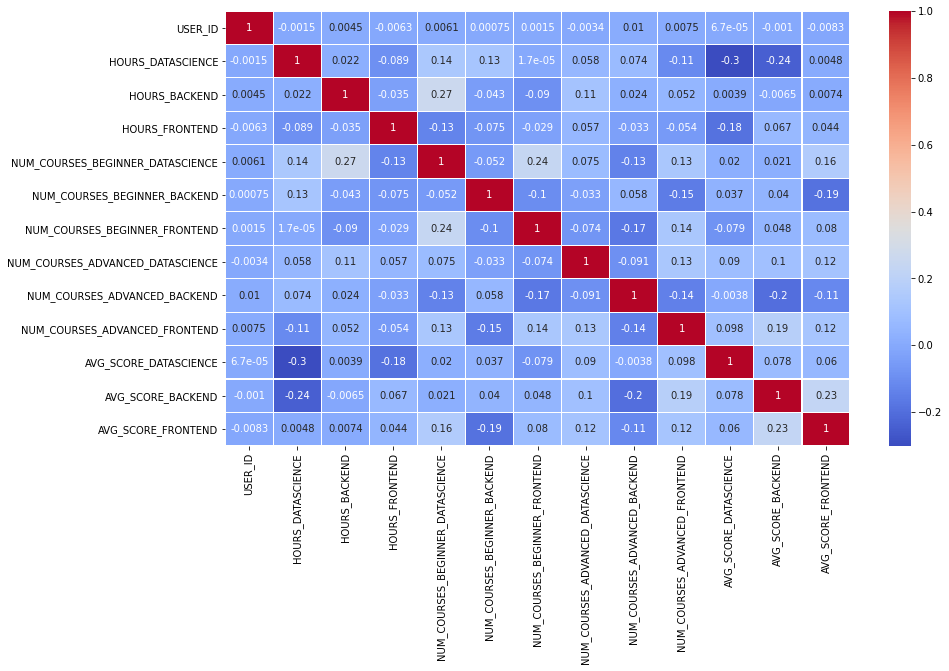

In [ ]:
#JAIRO HERNANDEZ
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,8))
sns.heatmap(df_data_2.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

In [ ]:
# Crear un objeto ``SimpleImputer``
si = SimpleImputer(
    missing_values=np.nan,  # los valores que faltan son del tipo ``np.nan`` (Pandas estándar)
    strategy='constant',  # la estrategia elegida es cambiar el valor faltante por una constante
    fill_value=0,  # la constante que se usará para completar los valores faltantes es un int64 = 0
    verbose=0,
    copy=True
)

In [ ]:
# Ver los datos faltantes del conjunto de datos antes de la primera transformación (df_data_2)
print("Valores nulos antes de la transformación SimpleImputer: \n\n{}\n".format(df_data_2.isnull().sum(axis = 0)))

Valores nulos antes de la transformación SimpleImputer: 

USER_ID                               0
HOURS_DATASCIENCE                    14
HOURS_BACKEND                        53
HOURS_FRONTEND                       16
NUM_COURSES_BEGINNER_DATASCIENCE     26
NUM_COURSES_BEGINNER_BACKEND         18
NUM_COURSES_BEGINNER_FRONTEND        39
NUM_COURSES_ADVANCED_DATASCIENCE      2
NUM_COURSES_ADVANCED_BACKEND          8
NUM_COURSES_ADVANCED_FRONTEND        37
AVG_SCORE_DATASCIENCE               220
AVG_SCORE_BACKEND                    84
AVG_SCORE_FRONTEND                  168
PROFILE                               0
dtype: int64



In [ ]:
###BEGIN JAIRO HERNANDEZ
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np

In [ ]:

imputer = KNNImputer()
data = df_data_2.drop(labels=['PROFILE'], axis='columns')
data = imputer.fit_transform(data)
data = np.append(data,np.array(df_data_2['PROFILE']).reshape(20000,1),axis=1)
print(data)
###END JAIRO HERNANDEZ###

[[58283940.0 7.0 39.0 ... 74.0 63.8 'beginner_front_end']
 [1357218.0 32.0 0.0 ... 45.0 74.6 'beginner_front_end']
 [63212105.0 45.0 0.0 ... 54.0 47.0 'advanced_front_end']
 ...
 [83752787.0 32.0 50.0 ... 81.0 75.0 'advanced_backend']
 [45806698.0 0.0 96.0 ... 68.0 68.0 'advanced_front_end']
 [67068866.0 51.0 24.0 ... 61.0 87.0 'advanced_data_science']]


In [ ]:
# Aplicamos el SimpleImputer ``si`` al conjunto de datos df_data_2 (resultado de la primera transformación)
si.fit(X=df_data_2)

# Reconstrucción de un nuevo DataFrame de Pandas con el conjunto imputado (df_data_3)
df_data_3 = pd.DataFrame.from_records(
    data=si.transform(
        X=df_data_2
    ),  # el resultado SimpleImputer.transform (<< pandas dataframe >>) es lista lista
    columns=df_data_2.columns  # las columnas originales deben conservarse en esta transformación
)

In [ ]:
################################

# Reconstrucción de un nuevo DataFrame de Pandas con el conjunto imputado (df_data_3)
df_data_3 = pd.DataFrame.from_records(
    data,  # KNNIMPUTER
    columns=df_data_2.columns  # las columnas originales deben conservarse en esta transformación
)
#################################

In [ ]:
# Ver los datos faltantes del conjunto de datos después de la segunda transformación (SimpleImputer) (df_data_3)
print("Valores nulos en el conjunto de datos después de la transformación SimpleImputer: \n\n{}\n".format(df_data_3.isnull().sum(axis = 0)))

Valores nulos en el conjunto de datos después de la transformación SimpleImputer: 

USER_ID                             0
HOURS_DATASCIENCE                   0
HOURS_BACKEND                       0
HOURS_FRONTEND                      0
NUM_COURSES_BEGINNER_DATASCIENCE    0
NUM_COURSES_BEGINNER_BACKEND        0
NUM_COURSES_BEGINNER_FRONTEND       0
NUM_COURSES_ADVANCED_DATASCIENCE    0
NUM_COURSES_ADVANCED_BACKEND        0
NUM_COURSES_ADVANCED_FRONTEND       0
AVG_SCORE_DATASCIENCE               0
AVG_SCORE_BACKEND                   0
AVG_SCORE_FRONTEND                  0
PROFILE                             0
dtype: int64



Tenga en cuenta que ya no tenemos valores perdidos en nuestro conjunto de datos :)

Vale la pena señalar que cambiar los valores perdidos por 0 no siempre es la mejor estrategia. Se anima al participante a estudiar e implementar diferentes estrategias para tratar los valores perdidos para mejorar su modelo y mejorar su puntuación final.

### Entrenando un modelo de clasificación

Una vez finalizado el preprocesamiento, ya tenemos el conjunto de datos en el formato necesario para entrenar nuestro modelo:

In [ ]:
df_data_3.head()

,USER_ID,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND,PROFILE
0,58283940.0,7.0,39.0,29.0,2.0,4.0,0.0,2.0,5.0,0.0,84.0,74.0,63.8,beginner_front_end
1,1357218.0,32.0,0.0,44.0,2.0,0.0,0.0,0.0,5.0,0.0,67.0,45.0,74.6,beginner_front_end
2,63212105.0,45.0,0.0,59.0,0.0,5.0,4.0,0.0,4.0,1.0,75.2,54.0,47.0,advanced_front_end
3,23239851.0,36.0,19.0,28.0,0.0,5.0,7.0,0.0,5.0,3.0,54.2,71.0,89.0,beginner_data_science
4,72234478.0,61.0,78.0,38.0,6.0,11.0,0.0,4.0,3.0,0.0,66.0,85.0,68.6,advanced_front_end


En el ejemplo proporcionado, usaremos todas las columnas, excepto la columna **Profile** como *feautres* (variables de entrada).

La variable **Profile** será la variable objetivo del modelo, como se describe en la declaración de desafío.

#### Definición de features del modelo

In [ ]:
# Definición de las columnas que seran features (Notese que la columna NOMBRE no esta presente)
'''
features = [
    "USER_ID", "HOURS_DATASCIENCE", "HOURS_BACKEND", "HOURS_FRONTEND",
    "NUM_COURSES_BEGINNER_DATASCIENCE", "NUM_COURSES_BEGINNER_BACKEND", "NUM_COURSES_BEGINNER_FRONTEND",
    "NUM_COURSES_ADVANCED_DATASCIENCE", "NUM_COURSES_ADVANCED_BACKEND", "NUM_COURSES_ADVANCED_FRONTEND",
    "AVG_SCORE_DATASCIENCE", "AVG_SCORE_BACKEND", "AVG_SCORE_FRONTEND"
]
'''

features = [
    "Unnamed: 0", "NAME", "USER_ID", "HOURS_DATASCIENCE", "HOURS_BACKEND", "HOURS_FRONTEND",
    "NUM_COURSES_BEGINNER_DATASCIENCE", "NUM_COURSES_BEGINNER_BACKEND", "NUM_COURSES_BEGINNER_FRONTEND",
    "NUM_COURSES_ADVANCED_DATASCIENCE", "NUM_COURSES_ADVANCED_BACKEND", "NUM_COURSES_ADVANCED_FRONTEND",
    "AVG_SCORE_DATASCIENCE", "AVG_SCORE_BACKEND", "AVG_SCORE_FRONTEND"
]

# Definición de variable objetivo
target = ['PROFILE']

# Preparación de los argumentos para los métodos de la biblioteca ``scikit-learn``
X = df_data_1[features]
y = df_data_1[target]

El conjunto de entrada (X):

In [ ]:
X.head()

,Unnamed: 0,NAME,USER_ID,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND
0,28,Stormy Muto,58283940,7.0,39.0,29.0,2.0,4.0,0.0,2.0,5.0,0.0,84.0,74.0,NaN
1,81,Carlos Ferro,1357218,32.0,0.0,44.0,2.0,0.0,0.0,0.0,5.0,0.0,67.0,45.0,NaN
2,89,Robby Constantini,63212105,45.0,0.0,59.0,0.0,5.0,4.0,0.0,4.0,1.0,NaN,54.0,47.0
3,138,Paul Mckenny,23239851,36.0,19.0,28.0,0.0,5.0,7.0,0.0,5.0,3.0,NaN,71.0,89.0
4,143,Jean Webb,72234478,61.0,78.0,38.0,6.0,11.0,0.0,4.0,3.0,0.0,66.0,85.0,NaN


La variable objetivo (y):

In [ ]:
y.head()

,PROFILE
0,beginner_front_end
1,beginner_front_end
2,advanced_front_end
3,beginner_data_science
4,advanced_front_end


#### Separar el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba

Separaremos el conjunto de datos provisto en dos grupos: uno para entrenar nuestro modelo y otro para probar el resultado a través de una prueba ciega. La separación del conjunto de datos se puede hacer fácilmente con el método *train_test_split ()* de scikit-learn:

In [ ]:
# Separación de datos en conjunto de entrenamiento y conjunto de pruebas
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=337)

In [ ]:
!pip install scikit-learn==0.23.0

In [ ]:
!pip install lightgbm

In [ ]:
#####JAIRO HERNANDEZ######
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

# NN models
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv_train = ShuffleSplit(n_splits=2, test_size=0.3, random_state=337)

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

ValueError: ignored

In [ ]:
from sklearn.metrics import accuracy_score
'''
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)
'''

'\nscaler = MinMaxScaler()\n\nX_train_scaled = scaler.fit_transform(X_train)\nX_train = pd.DataFrame(X_train_scaled)\n\nX_test_scaled = scaler.transform(X_test)\nX_test = pd.DataFrame(X_test_scaled)\n'

In [ ]:
X_train.iloc[:,2:]

,USER_ID,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND
15979,17333576,24.0,68.0,0.0,5.0,4.0,0.0,0.0,3.0,5.0,93.0,75.0,38.0
7847,40778774,31.0,46.0,49.0,5.0,4.0,4.0,2.0,6.0,6.0,71.0,84.0,82.0
16536,97273123,31.0,57.0,23.0,3.0,3.0,4.0,3.0,6.0,6.0,61.0,54.0,79.0
8589,79189125,27.0,49.0,29.0,0.0,1.0,4.0,3.0,7.0,1.0,73.0,73.0,67.0
19964,5968712,49.0,50.0,29.0,6.0,4.0,2.0,4.0,0.0,3.0,84.0,58.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,98068271,21.0,46.0,61.0,7.0,3.0,8.0,2.0,0.0,3.0,55.0,77.0,69.0
4539,77116211,9.0,27.0,27.0,7.0,3.0,8.0,5.0,6.0,9.0,77.0,83.0,62.0
12729,58770344,37.0,33.0,4.0,7.0,5.0,5.0,4.0,1.0,4.0,85.0,70.0,69.0
14402,52396067,28.0,45.0,21.0,4.0,2.0,0.0,1.0,8.0,7.0,89.0,35.0,37.0


In [ ]:
y_train = np.array(y_train).reshape(int(len(y_train)),)
y_test = np.array(y_test).reshape(int(len(y_test)),)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le1 = preprocessing.LabelEncoder()

le.fit(y_train)
y_train = le.transform(y_train)

le1.fit(y_test)
y_test = le1.transform(y_test)
print(y_train)
print(y_test)


[5 0 1 ... 0 5 0]
[5 1 4 ... 3 0 5]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [ ]:
dummy_y = np_utils.to_categorical(y_train)
print(dummy_y)

[[0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]]


In [ ]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(128, input_dim=len(features), activation='relu'))
    model.add(Dense(, activation = 'relu'))
    model.add(Dense(15, activation = 'linear'))
    model.add(Dense(len(dummy_y[0,:]), activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=50, batch_size=4, verbose=1)
#kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_train, dummy_y, cv=cv_train)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/50
3150/3150 [==============================] - 9s 3ms/step - loss: 0.4043 - accuracy: 0.8690
Epoch 2/50
3150/3150 [==============================] - 8s 3ms/step - loss: 0.2141 - accuracy: 0.9409
Epoch 3/50
3150/3150 [==============================] - 8s 3ms/step - loss: 0.1832 - accuracy: 0.9507
Epoch 4/50
3150/3150 [==============================] - 8s 3ms/step - loss: 0.1677 - accuracy: 0.9580
Epoch 5/50
3150/3150 [==============================] - 8s 3ms/step - loss: 0.1544 - accuracy: 0.9592
Epoch 6/50
3150/3150 [==============================] - 8s 3ms/step - loss: 0.1434 - accuracy: 0.9630
Epoch 7/50
3150/3150 [==============================] - 8s 3ms/step - loss: 0.1344 - accuracy: 0.9652
Epoch 8/50
3150/3150 [==============================] - 8s 3ms/step - loss: 0.1269 - accuracy: 0.9663
Epoch 9/50
3150/3150 [==============================] - 8s 3ms/step - loss: 0.1209 - accuracy: 0.9687
Epoch 10/50
3150/3150 [==============================] - 8s 3ms/step - loss: 0.115

In [ ]:
estimator.fit(X_train, y_train)
predict = estimator.predict(X_test)
print("Exactitud: {}%".format(100*round(accuracy_score(y_test, predict), 2)))

Epoch 1/50
3500/3500 [==============================] - 10s 3ms/step - loss: 0.3729 - accuracy: 0.8826
Epoch 2/50
3500/3500 [==============================] - 9s 3ms/step - loss: 0.2051 - accuracy: 0.9418
Epoch 3/50
3500/3500 [==============================] - 9s 3ms/step - loss: 0.1816 - accuracy: 0.9534
Epoch 4/50
3500/3500 [==============================] - 9s 3ms/step - loss: 0.1659 - accuracy: 0.9570
Epoch 5/50
3500/3500 [==============================] - 9s 3ms/step - loss: 0.1543 - accuracy: 0.9604
Epoch 6/50
3500/3500 [==============================] - 9s 3ms/step - loss: 0.1432 - accuracy: 0.9648
Epoch 7/50
3500/3500 [==============================] - 10s 3ms/step - loss: 0.1305 - accuracy: 0.9651
Epoch 8/50
3500/3500 [==============================] - 9s 3ms/step - loss: 0.1265 - accuracy: 0.9681
Epoch 9/50
3500/3500 [==============================] - 9s 3ms/step - loss: 0.1188 - accuracy: 0.9704
Epoch 10/50
3500/3500 [==============================] - 9s 3ms/step - loss: 0.1

In [ ]:
#models
from sklearn.model_selection import GridSearchCV
##cnn##

In [ ]:
# Voting Classifier

Voting_ens = VotingClassifier(estimators=[('log', logreg_CV), ('mlp', mlp_GS ), ('svc', linear_svc_CV)])
Voting_ens.fit(X_train, y_train)
predict = Voting_ens.predict(X_test)


print("Exactitud: {}%".format(100*round(accuracy_score(y_test, predict), 2)))

Exactitud: 71.0%


In [ ]:
# Gaussian Process Classification

gpc = GaussianProcessClassifier()
param_grid = {'max_iter_predict': [70, 80, 90],
              'warm_start': [False],
              'n_restarts_optimizer': range(2,4)}
gpc_CV = GridSearchCV(estimator=gpc, param_grid=param_grid, cv=cv_train, verbose=False).fit(X_train,y_train)
predict = gpc_CV.predict(X_test)


print(gpc_CV.best_params_)
print("Exactitud: {}%".format(100*round(accuracy_score(y_test, predict), 2)))

KeyboardInterrupt: ignored

In [ ]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
param_grid={'var_smoothing': [1e-4, 1e-5, 1e-6]}
gaussian_CV = GridSearchCV(estimator=gaussian, param_grid=param_grid, cv=cv_train, verbose=False).fit(X_train,y_train)
predict = gaussian_CV.predict(X_test)


print(gaussian_CV.best_params_)
print("Exactitud: {}%".format(100*round(accuracy_score(y_test, predict), 2)))

{'var_smoothing': 0.0001}
Exactitud: 71.0%


In [ ]:
# Logistic Regression

logreg = LogisticRegression()
logreg_CV = GridSearchCV(estimator=logreg, param_grid={'C' : [.1 ,.2, .3, .4, .5, .6, .7, .8, .9]}, cv=cv_train, verbose=False).fit(X_train,y_train)
predict = logreg_CV.predict(X_test)


print(logreg_CV.best_params_)
print("Exactitud: {}%".format(100*round(accuracy_score(y_test, predict), 2)))

{'C': 0.1}
Exactitud: 71.0%


In [ ]:
# AdaBoost Classifier
Ada_Boost = AdaBoostClassifier()
Ada_Boost_CV = GridSearchCV(estimator=Ada_Boost, param_grid={'learning_rate' : [0.095, 0.1, 0.101, 0.102, 0.105]}, cv=cv_train, verbose=False).fit(X_train,y_train)
predict = Ada_Boost_CV.predict(X_test)


print(Ada_Boost_CV.best_params_)
print("Exactitud: {}%".format(100*round(accuracy_score(y_test, predict), 2)))

{'learning_rate': 0.105}
Exactitud: 57.99999999999999%


In [ ]:
# Extra Trees Classifier

etr = ExtraTreesClassifier()
etr_CV = GridSearchCV(estimator=etr, param_grid={'min_samples_leaf' : [11, 12, 13, 14]}, cv=cv_train, verbose=False).fit(X_train,y_train)
predict = etr_CV.predict(X_test)


print(etr_CV.best_params_)
print("Exactitud: {}%".format(100*round(accuracy_score(y_test, predict), 2)))

{'min_samples_leaf': 11}
Exactitud: 89.0%


In [ ]:
# Bagging Classifier
bagging = BaggingClassifier()
param_grid={'max_features': [0.85, 0.9, 0.95],
            'n_estimators': [3, 4, 5, 10, 20, 50],
            'warm_start' : [False],
            'random_state': [14]}
bagging_CV = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=cv_train, verbose=False).fit(X_train,y_train)
predict = bagging_CV.predict(X_test)


print(bagging_CV.best_params_)
print("Exactitud: {}%".format(100*round(accuracy_score(y_test, predict), 2)))

{'max_features': 0.85, 'n_estimators': 50, 'random_state': 14, 'warm_start': False}
Exactitud: 91.0%


In [ ]:
# Ridge Classifier
ridge = RidgeClassifier()
ridge_CV = GridSearchCV(estimator=ridge, param_grid={'alpha': np.linspace(.1, 1.5, 15, 100)}, cv=cv_train, verbose=False).fit(X_train,y_train)
predict = ridge_CV.predict(X_test)


print(ridge_CV.best_params_)
print("Exactitud: {}%".format(100*round(accuracy_score(y_test, predict), 2)))

{'alpha': 0.1}
Exactitud: 69.0%


In [ ]:
# Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier()
param_grid = {'learning_rate' : [0.05, 0.06, 0.07, 0.08],
              'max_depth': [i for i in range(2,3)],
              'min_samples_leaf': [i for i in range(3,8)]}
gradient_boosting_CV = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid, 
                                    cv=cv_train, verbose=False).fit(X_train,y_train)
predict = gradient_boosting_CV.predict(X_test)


print(gradient_boosting_CV.best_params_)
print("Exactitud: {}%".format(100*round(accuracy_score(y_test, predict), 2)))

{'learning_rate': 0.08, 'max_depth': 2, 'min_samples_leaf': 5}
Exactitud: 81.0%


In [ ]:
#LGBMClassifier
modelL = lgb.LGBMClassifier(n_estimators=1000, num_leaves=20)
modelL.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=True)
predict = modelL.predict(X_test)
print("Exactitud: {}%".format(100*round(accuracy_score(y_test, predict), 2)))

[1]	valid_0's multi_logloss: 1.66758
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's multi_logloss: 1.56474
[3]	valid_0's multi_logloss: 1.47551
[4]	valid_0's multi_logloss: 1.3949
[5]	valid_0's multi_logloss: 1.3275
[6]	valid_0's multi_logloss: 1.26457
[7]	valid_0's multi_logloss: 1.2084
[8]	valid_0's multi_logloss: 1.15834
[9]	valid_0's multi_logloss: 1.11113
[10]	valid_0's multi_logloss: 1.0678
[11]	valid_0's multi_logloss: 1.02761
[12]	valid_0's multi_logloss: 0.991464
[13]	valid_0's multi_logloss: 0.957274
[14]	valid_0's multi_logloss: 0.927093
[15]	valid_0's multi_logloss: 0.897198
[16]	valid_0's multi_logloss: 0.870004
[17]	valid_0's multi_logloss: 0.844314
[18]	valid_0's multi_logloss: 0.821296
[19]	valid_0's multi_logloss: 0.798195
[20]	valid_0's multi_logloss: 0.776901
[21]	valid_0's multi_logloss: 0.757236
[22]	valid_0's multi_logloss: 0.738095
[23]	valid_0's multi_logloss: 0.720509
[24]	valid_0's multi_logloss: 0.703471
[25]	valid_0's multi_loglo

In [ ]:
# XGBoost Classifier
xgb_clf = xgb.XGBClassifier(objective='reg:squarederror') 
parameters = {'n_estimators': [50, 60, 70, 80, 90], 
              'learning_rate': [0.09, 0.1, 0.15, 0.2],
              'max_depth': [3, 4, 5]}
xgb_reg = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=cv_train).fit(X_train,y_train)
predict = xgb_reg.predict(X_test)


print(xgb_reg.best_params_)
print("Exactitud: {}%".format(100*round(accuracy_score(y_test, predict), 2)))

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 90}
Exactitud: 91.0%


In [ ]:
# Random Forest
random_forest = RandomForestClassifier()
param_grid = {'n_estimators': [40, 50, 60], 'min_samples_split': [40, 50, 60, 70], 'min_samples_leaf': [12, 13, 14, 15, 16, 17], 
              'max_features': ['auto'], 'max_depth': [3, 4, 5, 6], 'criterion': ['gini'], 'bootstrap': [False]}
random_forest_CV = GridSearchCV(estimator=random_forest, param_grid=param_grid, 
                             cv=cv_train, verbose=False).fit(X_train,y_train)
predict = random_forest_CV.predict(X_test)


print(random_forest_CV.best_params_)
print("Exactitud: {}%".format(100*round(accuracy_score(y_test, predict), 2)))

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 17, 'min_samples_split': 50, 'n_estimators': 50}
Exactitud: 79.0%


In [ ]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
param_grid = {'min_samples_leaf': [i for i in range(2,10)]}
decision_tree_CV = GridSearchCV(decision_tree, param_grid=param_grid, cv=cv_train, verbose=False).fit(X_train,y_train)
predict = decision_tree_CV.predict(X_test)


print(decision_tree_CV.best_params_)
print("Exactitud: {}%".format(100*round(accuracy_score(y_test, predict), 2)))

{'min_samples_leaf': 3}
Exactitud: 75.0%


In [ ]:
# Stochastic Gradient Descent
sgd = SGDClassifier(early_stopping=True)
param_grid = {'alpha': [0.035, 0.04, 0.45]}
sgd_CV = GridSearchCV(sgd, param_grid=param_grid, cv=cv_train, verbose=False).fit(X_train,y_train)
predict = sgd_CV.predict(X_test)


print(sgd_CV.best_params_)
print("Exactitud: {}%".format(100*round(accuracy_score(y_test, predict), 2)))

{'alpha': 0.035}
Exactitud: 69.0%


In [ ]:
#MLPClassif
mlp = MLPClassifier()
param_grid = {'hidden_layer_sizes': [i for i in range(2,5)],
              'solver': ['sgd'],
              'learning_rate': ['adaptive'],
              'max_iter': [1000]
              }
mlp_GS = GridSearchCV(mlp, param_grid=param_grid, cv=cv_train, verbose=False).fit(X_train,y_train)
predict = mlp_GS.predict(X_test)


print(mlp_GS.best_params_)
print("Exactitud: {}%".format(100*round(accuracy_score(y_test, predict), 2)))

{'hidden_layer_sizes': 4, 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'sgd'}
Exactitud: 71.0%


In [ ]:
#LINEAR SVC
linear_svc = LinearSVC()
param_grid = {'dual':[False],
              'C': np.linspace(1, 15, 15)}
linear_svc_CV = GridSearchCV(linear_svc, param_grid=param_grid, cv=cv_train, verbose=False).fit(X_train,y_train)
predict = linear_svc_CV.predict(X_test)


print(linear_svc_CV.best_params_)
print("Exactitud: {}%".format(100*round(accuracy_score(y_test, predict), 2)))

{'C': 3.0, 'dual': False}
Exactitud: 71.0%


In [ ]:
#SVR
svr = SVC()
svr_CV = GridSearchCV(svr, param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                                       'tol': [1e-3]}, 
                      cv=cv_train, verbose=False).fit(X_train,y_train)
predict = svr_CV.predict(X_test)


print(svr_CV.best_params_)
print("Exactitud: {}%".format(100*round(accuracy_score(y_test, predict), 2)))

{'kernel': 'rbf', 'tol': 0.001}
Exactitud: 94.0%


In [ ]:
##KNN
knn = KNeighborsClassifier()
knn_CV = GridSearchCV(estimator=knn, param_grid={'n_neighbors': range(1, 100)}, 
                      cv=cv_train, verbose=False).fit(X_train,y_train)
predict = knn_CV.predict(X_test)

# Precisión lograda por knn con gridsearchcv
print(knn_CV.best_params_)
print("Exactitud: {}%".format(100*round(accuracy_score(y_test, predict), 2)))
###########END JAIRO HERNANDEZ###################

{'n_neighbors': 14}
Exactitud: 93.0%


#### Creando un modelo basado en árboles de decisión

En el ejemplo proporcionado, crearemos un clasificador basado en **árboles de decisión**.

El primer paso es básicamente crear una instancia de un objeto *DecisionTreeClassifier ()* de la biblioteca scikit-learn.

In [ ]:
# Creando el árbol de decisiones con la biblioteca ``scikit-learn``:
dtc_model = DecisionTreeClassifier()  # El modelo se creará con los parámetros estándar de la biblioteca

Material teórico sobre árboles de decisión en la documentación oficial de scikit-learn: https://scikit-learn.org/stable/modules/tree.html

Una guía para principiantes del mundo del aprendizaje automático: https://developer.ibm.com/es/patterns/use-icp4d-to-build-the-machine-learning-model-for-return-propensity/

#### Ejecucion del entrenamiento del árbol de descisión 

In [ ]:
# Entrenamiento de modelos (llamado método *fit ()* con conjuntos de entrenamiento)
dtc_model.fit(
    X_train,
    y_train
)

DecisionTreeClassifier()

#### Ejecución de predicciones y evaluación del modelo creado

In [ ]:
# Realización de una prueba a ciegas en el modelo creado
y_pred = dtc_model.predict(X_test)

In [ ]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.320898,-1.060326,0.431051,-0.234615,0.649361,0.616990,0.416144,-0.658677,1.701570,0.318352,2.006331,0.475715,-0.497647
1,-0.188413,0.559245,1.016509,-0.916357,0.151516,0.616990,-1.323639,1.711128,2.629413,-0.681835,-0.578143,-1.288428,-0.705198
2,-0.629980,-0.520469,-1.955816,-0.526790,-0.844175,-0.339637,-0.453748,0.763206,-1.081957,0.318352,1.934540,0.899109,0.540106
3,0.599449,1.638960,0.881403,-0.721574,2.142898,0.138677,-0.018802,1.711128,1.701570,-1.682022,-0.793515,-1.358994,-1.397034
4,-0.552408,1.099102,-0.649795,-0.867662,2.142898,-1.774576,1.720981,-1.606600,-1.081957,0.818446,-0.649934,-0.935600,1.854595


In [ ]:
print(y_pred)

['beginner_front_end' 'advanced_data_science' 'beginner_data_science' ...
 'beginner_backend' 'advanced_backend' 'beginner_front_end']


In [ ]:
from sklearn.metrics import accuracy_score

# Precisión lograda por el árbol de decisiones
print("Exactitud: {}%".format(100*round(accuracy_score(y_test, y_pred), 2)))

Exactitud: 75.0%


<hr>

Este notebook demostró cómo trabajar con transformaciones y modelos con la biblioteca scikit-learn. Se recomienda que el participante realice sus experimentos editando el código proporcionado aquí hasta lograr un modelo con alta precisión.

Cuando esté satisfecho con su modelo, puede pasar al segundo paso del desafío: encapsular su modelo como una API REST lista para usar con Watson Machine Learning.

El notebook para la segunda etapa ya está en este proyecto, simplemente acceda a la pestaña **ASSETS** e inícielo. No olvide apagar primero el Kernel en este portátil para reducir el consumo de su nivel gratuito de IBM Cloud Pak for Data.